<a href="https://colab.research.google.com/github/henriquepxl/Random-Forest-for-Urban-Expansion-Prediction-Simulation/blob/main/previsao2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
urb2020 = np.zeros((c2020.shape[0], c2020.shape[1]) )

for i in range(c2020.shape[0]):
  for j in range(c2020.shape[1]):
    if c2020[i][j]==1 or urb2015[i][j] ==1:
      urb2020[i][j] = 1
    elif c2020[i][j] == -1:
      urb2020[i][j]=-1

In [ ]:
path = ('/content/gdrive/My Drive/Mestrado/Experimentos/classifica2015.tif')
dataSource = gdal.Open(path)

In [ ]:
driverTiff = gdal.GetDriverByName('GTiff')
segments_ds = driverTiff.Create('potr2020.tif', dataSource.RasterXSize, dataSource.RasterYSize,
                                1, gdal.GDT_Float32)
segments_ds.SetGeoTransform(dataSource.GetGeoTransform())
segments_ds.SetProjection(dataSource.GetProjectionRef())
segments_ds.GetRasterBand(1).WriteArray(potr2020)
segments_ds = None

In [ ]:
vizin2015 = np.zeros((c2020.shape[0], c2020.shape[1]) )

for i in range(1, urb2015.shape[0]-1):
  for j in range(1, urb2015.shape[1]-1):
    vizinhanca = urb2015[i-1 :i+2, j-1 :j+2]
    cont_urb = sum(sum(vizinhanca == 1))
    if urb2015[i, j] != -1:
      vizin2015[i, j] = cont_urb
    elif urb2015[i][j]==-1:
      vizin2015[i, j] = -1

In [ ]:
potr2020 = np.zeros((urb2015.shape[0], urb2015.shape[1]) )

for i in range(urb2015.shape[0]):
  for j in range(urb2015.shape[1]):
    if urb2020[i][j]==1 and urb2015[i][j]==0:
      potr2020[i][j] = 1
    elif urb2020[i][j] == -1:
      potr2020[i][j]=-1

In [ ]:
from osgeo import gdal
import numpy as np
import pandas as pd

def ler_img(nome):

  path = ('/content/gdrive/My Drive/Mestrado/Experimentos/' + nome + '.tif')
  print(path)
  dataSource = gdal.Open(path)
  nome = dataSource.GetRasterBand(1)
  nome = nome.ReadAsArray()
  return nome

c2020 = ler_img('classifica2020')
decliv = ler_img('decliv')
pop_2010 = ler_img('pop2010_novo')
dist_centro = ler_img('dist_centro_novo')
dist_rod = ler_img('dist_rodovias')
dist_rpri = ler_img('dist_rprimario')
dist_rsec = ler_img('dist_rsecundario')
dist_rter = ler_img('dist_rterciario')
dist_urb = ler_img('dist_urb2015')
vizin2015 = ler_img('vizin2015')
urb2015 = ler_img('urb2015')
urb2020 = ler_img('urb2020')
potr2020 = ler_img('potr2020')

/content/gdrive/My Drive/Mestrado/Experimentos/classifica2020.tif
/content/gdrive/My Drive/Mestrado/Experimentos/decliv.tif
/content/gdrive/My Drive/Mestrado/Experimentos/pop2010_novo.tif
/content/gdrive/My Drive/Mestrado/Experimentos/dist_centro_novo.tif
/content/gdrive/My Drive/Mestrado/Experimentos/dist_rodovias.tif
/content/gdrive/My Drive/Mestrado/Experimentos/dist_rprimario.tif
/content/gdrive/My Drive/Mestrado/Experimentos/dist_rsecundario.tif
/content/gdrive/My Drive/Mestrado/Experimentos/dist_rterciario.tif
/content/gdrive/My Drive/Mestrado/Experimentos/dist_urb2015.tif
/content/gdrive/My Drive/Mestrado/Experimentos/vizin2015.tif
/content/gdrive/My Drive/Mestrado/Experimentos/urb2015.tif
/content/gdrive/My Drive/Mestrado/Experimentos/urb2020.tif
/content/gdrive/My Drive/Mestrado/Experimentos/potr2020.tif


In [ ]:
for i in range(c2020.shape[0]):
  for j in range(c2020.shape[1]):
    if c2020[i][j]==-1:
      vizin2015[i][j] = -1

In [ ]:
print ("%.0f" % decliv[0][0])
print ("%.0f" % pop_2010[0][0])
print ("%.0f" % dist_centro[0][0])
print ("%.0f" % dist_rod[0][0])
print ("%.0f" % dist_rpri[0][0])
print ("%.0f" % dist_rsec[0][0])
print ("%.0f" % dist_rter[0][0])
print ("%.0f" % dist_urb[0][0])
print ("%.0f" % vizin2015[0][0])
print ("%.0f" % urb2015[0][0])
print ("%.0f" % urb2020[0][0])
print ("%.0f" % potr2020[0][0])

In [ ]:
#Criando tabela (vazia) onde cada linha é um valor de pixel e cada coluna é uma imagem/fator
tabela = np.zeros((3270666,13))
#Preenchendo a tabela pra usar no treinamento
k=0
for i in range(decliv.shape[0]):
  for j in range(decliv.shape[1]):
    tabela[k][0] = decliv[i][j]
    tabela[k][1] = pop_2010[i][j]
    tabela[k][2] = dist_centro[i][j]
    tabela[k][3] = dist_rod[i][j]
    tabela[k][4] = dist_rpri[i][j]
    tabela[k][5] = dist_rsec[i][j]
    tabela[k][6] = dist_rter[i][j]
    tabela[k][7] = dist_urb[i][j]
    tabela[k][8] = vizin2015[i][j]
    tabela[k][9] = urb2015[i][j]
    tabela[k][10] = potr2020[i][j]
    tabela[k][11] = i
    tabela[k][12] = j
    k += 1

In [ ]:
tab_for = np.zeros((1854953,13))
#Prenchendo a tabela sem os NO DATA VALUE
j= 0
for i in range(3270666):
  if tabela[i][0] != -1:
    tab_for[j] = tabela[i]
    j += 1

In [ ]:
data = pd.DataFrame(tab_for, columns  = ['Declividade','Densidade_Pop', 'Dist_Centro', 'Dist_Rodovias', 'Dist_Primárias', 'Dist_Secundárias', 'Dist_Terciárias', 'Dist_Urbano', 'Vizinhos_Urbanos', 'Urbano', 'PoTr2020','L','C'])
data

,Declividade,Densidade_Pop,Dist_Centro,Dist_Rodovias,Dist_Primárias,Dist_Secundárias,Dist_Terciárias,Dist_Urbano,Vizinhos_Urbanos,Urbano,PoTr2020,L,C
0,6.864781,2362.0,9480.189453,5554.862793,758.946655,458.911743,450.000000,67.082039,0.0,0.0,0.0,0.0,396.0
1,10.145716,2362.0,9480.047852,5526.843750,729.931519,453.982361,450.000000,94.868332,0.0,0.0,0.0,0.0,397.0
2,12.119548,2362.0,9480.000000,5498.845215,700.357056,450.998901,450.998901,108.166534,0.0,0.0,0.0,0.0,398.0
3,4.934152,2362.0,9450.761719,5600.446289,807.774719,445.982056,420.000000,0.000000,1.0,1.0,0.0,1.0,394.0
4,9.529784,2362.0,9450.428711,5572.333496,778.845276,436.806580,420.000000,30.000000,1.0,0.0,0.0,1.0,395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854948,2.820058,1.0,40667.753906,19127.912109,38935.148438,22213.232422,13597.183594,1656.532471,0.0,0.0,0.0,1804.0,1423.0
1854949,1.772422,1.0,40685.355469,19154.312500,38955.031250,22237.427734,13600.194336,1681.071045,0.0,0.0,0.0,1804.0,1424.0
1854950,9.371562,1.0,40702.968750,19180.724609,38974.929688,22261.636719,13603.271484,1705.784180,0.0,0.0,0.0,1804.0,1425.0
1854951,0.487109,1.0,40674.480469,19115.816406,38937.757812,22206.830078,13624.095703,1650.000000,0.0,0.0,0.0,1805.0,1422.0


0.08790329319988725
Populating the interactive namespace from numpy and matplotlib


<BarContainer object of 10 artists>

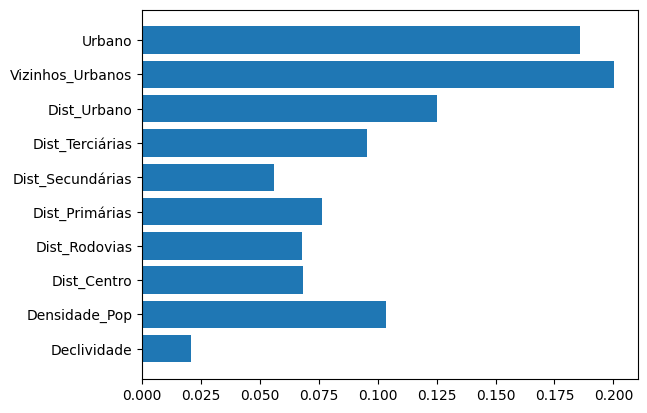

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import numpy as np

X = data.drop(["PoTr2020", "L", "C"], axis=1)
y = data['PoTr2020']

Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.25, random_state=0)
arvores = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=0, n_jobs=-1)
arvores.fit(Xtr, ytr)
p = arvores.predict(X)

print(np.sqrt(mean_squared_error(y, p)))

%pylab inline
plt.barh(list(X.columns), arvores.feature_importances_)

0.09036339841155457

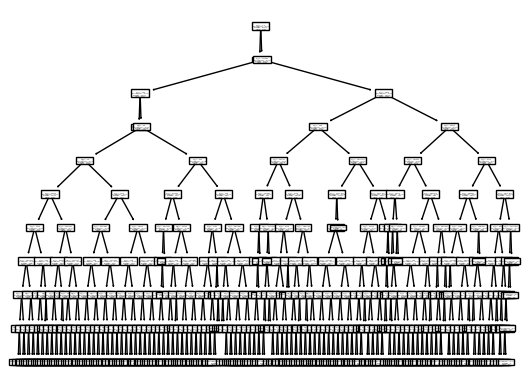

In [ ]:
from sklearn import tree
tree.plot_tree(arvores.estimators_[0],  feature_names=X.columns, class_names)
plt.show()

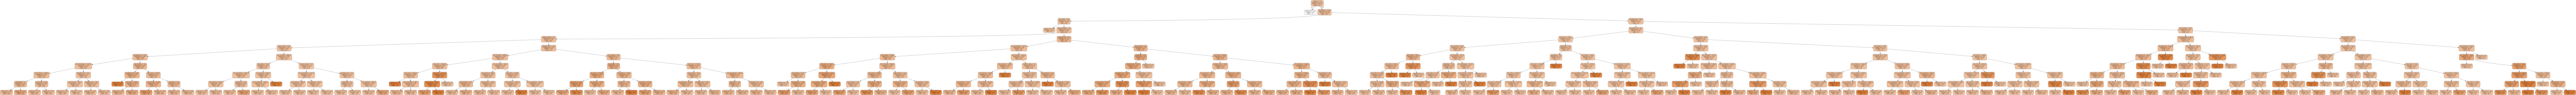

In [ ]:
estimator = arvores.estimators_[1]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator,
                feature_names=X.columns,
                class_names=True,
                label='all',
                impurity=True,
                #node_ids=True,
                out_file='tree.dot',
                rounded = True, proportion = True,
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
p = arvores.predict(X)

a = data.to_numpy()
c = np.transpose(p)
b = np.column_stack((a, c))

tab_com_p = pd.DataFrame(b, columns = ['decliv','pop_2010', 'dist_centro', 'dist_rod', 'dist_rpri', 'dist_rsec', 'dist_rter', 'dist_urb', 'vizin2015', 'Urb2015', 'PoTr2020','L','C', 'P'])

from osgeo import gdal_array
path = ('/content/gdrive/My Drive/Mestrado/Experimentos/decliv.tif')
dataSource = gdal.Open(path)
PoTr_n1000_d10_2020 = np.zeros((dataSource.RasterYSize, dataSource.RasterXSize),
                 dtype=gdal_array.GDALTypeCodeToNumericTypeCode(gdal.GDT_Float32))

#Preenchendo array com p em suass respectivas coordenadas (i, j)
for i in range(tab_com_p.shape[0]):
  PoTr_n1000_d10_2020[int(tab_com_p.iloc[i][11])][int(tab_com_p.iloc[i][12])] = tab_com_p.iloc[i][13]

#colocando valores -1 (no data value):
for i in range(PoTr_n1000_d10_2020.shape[0]):
  for j in range(PoTr_n1000_d10_2020.shape[1]):
    if decliv[i][j]== -1:
      PoTr_n1000_d10_2020[i][j]= -1

In [ ]:
driverTiff = gdal.GetDriverByName('GTiff')

segments_ds = driverTiff.Create('PoTr_n1000_d10_2020ruas.tif', dataSource.RasterXSize, dataSource.RasterYSize,
                                1, gdal.GDT_Float32)
segments_ds.SetGeoTransform(dataSource.GetGeoTransform())
segments_ds.SetProjection(dataSource.GetProjectionRef())
segments_ds.GetRasterBand(1).WriteArray(PoTr_n1000_d10_2020)
segments_ds = None

In [ ]:
path = ('/content/gdrive/My Drive/Mestrado/Experimentos/corpos_dagua.tif')
dataSource = gdal.Open(path)
corpos_dagua = dataSource.GetRasterBand(1)
corpos_dagua = corpos_dagua.ReadAsArray()
path = ('/content/gdrive/My Drive/Mestrado/Experimentos/PoTr_n1000_d10_2020ruas.tif')
dataSource = gdal.Open(path)
PoTr_n1000_d10_2020 = dataSource.GetRasterBand(1)
PoTr_n1000_d10_2020 = PoTr_n1000_d10_2020.ReadAsArray()

In [ ]:
from copy import deepcopy
prev2020 = deepcopy(urb2015)

for i in range(urb2015.shape[0]):
  for j in range(urb2015.shape[1]):
    if PoTr_n1000_d10_2020[i][j] >= 0.167591 and corpos_dagua[i][j] != 1:
      prev2020[i][j] = 1

crescimento_verdadeiro = sum(sum(((urb2020 == 1).astype(int) - (urb2015 == 1).astype(int)) != 0))# * (30 ** 2) / 1000000

crescimento_previsto = sum(sum(((prev2020 == 1).astype(int) - (urb2015 == 1).astype(int)) != 0))#* (30 ** 2) / 1000000

acuracia_espacial = 100 - (sum(sum(((prev2020 == 1).astype(float) - (urb2020 == 1).astype(float)) != 0)) / sum(sum(urb2020 == 1))) * 100

print("Crescimento Verdadeiro: %d, Crescimento Predito: %d" % (crescimento_verdadeiro, crescimento_previsto))
print("Acurácia Espacial: %f" % (acuracia_espacial))

Crescimento Verdadeiro: 16891, Crescimento Predito: 16891
Acurácia Espacial: 95.454338


In [ ]:
driverTiff = gdal.GetDriverByName('GTiff')

segments_ds = driverTiff.Create('prev2020.tif', dataSource.RasterXSize, dataSource.RasterYSize,
                                1, gdal.GDT_Float32)
segments_ds.SetGeoTransform(dataSource.GetGeoTransform())
segments_ds.SetProjection(dataSource.GetProjectionRef())
segments_ds.GetRasterBand(1).WriteArray(prev2020)
segments_ds = None

In [ ]:
urb2020lista=[]
prev2020lista = []
for i in range(urb2015.shape[0]):
  for j in range(urb2015.shape[1]):
    if urb2015[i][j]!=-1:
      if urb2015[i][j]==1 and urb2020[i][j]==1:
        pass
      else:
        urb2020lista.append(urb2020[i][j])
        prev2020lista.append(prev2020[i][j])
confusion_matrix(urb2020lista, prev2020lista, labels=[1, 0])

array([[   4957,   11934],
       [  11934, 1317984]])

In [ ]:
confusion_matrix(urb2020lista, prev2020lista, labels=[1, 0])

array([[ 513138,   11934],
       [  11934, 1317984]])

In [ ]:
urb2020lista=[]
from sklearn.metrics import confusion_matrix
for i in range(urb2015.shape[0]):
  for j in range(urb2015.shape[1]):
    if urb2015[i][j]!=-1:
      if urb2015[i][j]==1 and urb2020[i][j]==1:
        pass
      else:
        urb2020lista.append(urb2020[i][j])
prev2020lista = []
for i in range(urb2015.shape[0]):
  for j in range(urb2015.shape[1]):
    if urb2015[i][j]!=-1:
      if urb2015[i][j]==1 and urb2020[i][j]==1:
        pass
      else:
          prev2020lista.append(prev2020[i][j])
confusion_matrix(urb2020lista, prev2020lista, labels=[1, 0])

array([[      0,   16891],
       [      0, 1329918]])

In [ ]:
from copy import deepcopy
from sklearn.metrics import confusion_matrix
t=0
tpr_lista = []
fpr_lista = []

urb2020lista=[]

while t<=1.005:
  prev2020 = deepcopy(urb2015)
  prev2020lista = []
  urb2020lista=[]

  for i in range(urb2015.shape[0]):
    for j in range(urb2015.shape[1]):
      if PoTr_n1000_d10_2020[i][j] >= t and corpos_dagua[i][j] != 1:
        prev2020[i][j] = 1


  for i in range(urb2015.shape[0]):
    for j in range(urb2015.shape[1]):
      if urb2015[i][j]!=-1:
        prev2020lista.append(prev2020[i][j])
        urb2020lista.append(urb2020[i][j])

  confusion = confusion_matrix(urb2020lista, prev2020lista, labels=[1, 0])
  if (confusion[0][1]+ confusion[1][1]) == 0:
    fpr_lista.append(0)
    tpr = confusion[0][0]/ (confusion[0][0] + confusion[0][1])
    tpr_lista.append(tpr)
  elif (confusion[0][0] + confusion[1][0])== 0:
    tpr_lista.append(0)
    fpr = confusion[1][0]/ (confusion[1][0]+ confusion[1][1])
    fpr_lista.append(fpr)
  else:
    tpr = confusion[0][0]/ (confusion[0][0] + confusion[0][1])
    tpr_lista.append(tpr)
    fpr = confusion[1][0]/ (confusion[1][0]+ confusion[1][1])
    fpr_lista.append(fpr)
  print(t)
  t += 0.005

In [ ]:
from numpy import trapz
# Compute the area using the composite trapezoidal rule.
area = trapz(tpr_lista, fpr_lista)
print("area =", area)

area = -0.981442596616784


In [ ]:
from copy import deepcopy
from sklearn.metrics import confusion_matrix
t=0
tpr_lista = []
fpr_lista = []


while t<=1.005:
  prev2020 = deepcopy(urb2015)
  prev2020lista = []

  for i in range(urb2015.shape[0]):
    for j in range(urb2015.shape[1]):
      if PoTr_n1000_d10_2020[i][j] >= t and corpos_dagua[i][j] != 1:
        prev2020[i][j] = 1


  for i in range(urb2015.shape[0]):
    for j in range(urb2015.shape[1]):
      if urb2015[i][j]!=-1:
        if urb2015[i][j]==1 and urb2020[i][j]==1:
          pass
        else:
          prev2020lista.append(prev2020[i][j])

  confusion = confusion_matrix(urb2020lista, prev2020lista, labels=[1, 0])
  if (confusion[0][1]+ confusion[1][1]) == 0:
    fpr_lista.append(0)
    tpr = confusion[0][0]/ (confusion[0][0] + confusion[0][1])
    tpr_lista.append(tpr)
  elif (confusion[0][0] + confusion[1][0])== 0:
    tpr_lista.append(0)
    fpr = confusion[1][0]/ (confusion[1][0]+ confusion[1][1])
    fpr_lista.append(fpr)
  else:
    tpr = confusion[0][0]/ (confusion[0][0] + confusion[0][1])
    tpr_lista.append(tpr)
    fpr = confusion[1][0]/ (confusion[1][0]+ confusion[1][1])
    fpr_lista.append(fpr)
  print(t)
  t += 0.005

In [ ]:
from numpy import trapz
# Compute the area using the composite trapezoidal rule.
area = trapz(tpr_lista, fpr_lista)
print("area =", area)

area = -0.909416918175294


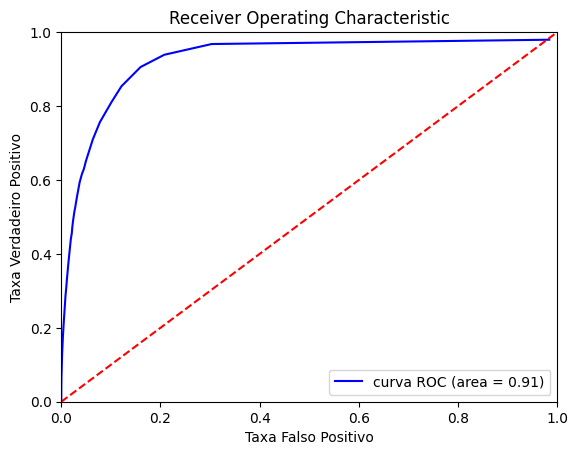

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_lista, tpr_lista, 'b', label='curva ROC (area = {:.2f})'.format(0.909416918175294))
#plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa Verdadeiro Positivo')
plt.xlabel('Taxa Falso Positivo')
plt.legend(loc="lower right")
plt.show()